In [1]:
from urllib import request
resp = request.urlopen('https://movie.douban.com/nowplaying/hangzhou/')
html_data = resp.read().decode('utf-8')

In [2]:
print(html_data)

<!DOCTYPE html>
<html lang="zh-cmn-Hans" class="">
<head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <meta name="renderer" content="webkit">
    <meta name="referrer" content="always">
    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />
    <title>
    杭州 - 在线购票&amp;影讯
</title>
    
    <meta name="baidu-site-verification" content="cZdR4xxR7RxmM4zE" />
    <meta http-equiv="Pragma" content="no-cache">
    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">
    
    
    <meta name="keywords" content="杭州,在线购票,网上电影票预订,优惠电影票,影讯,排片,放映时间,电影票价"/>
    <meta name="description" content="杭州电影院在线优惠购票及影讯排片查询"/>

    <link rel="apple-touch-icon" href="/pics/movie/apple-touch-icon.png">
    <link href="https://img3.doubanio.com/f/shire/bf61b1fa02f564a4a8f809da7c7179b883a56146/css/douban.css" rel="stylesheet" type="text/css">
    <link href="https://img3.doubanio.com/f/shire/ae3f5a3e3085968370b1fc63afcecb22

In [3]:
from bs4 import BeautifulSoup as bs
soup = bs(html_data, 'html.parser')    
nowplaying_movie = soup.find_all('div', id='nowplaying')
nowplaying_movie_list = nowplaying_movie[0].find_all('li', class_='list-item')

In [5]:
print(nowplaying_movie_list[0])

<li class="list-item" data-actors="黄渤 / 舒淇 / 王宝强" data-category="nowplaying" data-director="黄渤" data-duration="134分钟" data-enough="True" data-region="中国大陆" data-release="2018" data-score="7.4" data-showed="True" data-star="40" data-subject="26985127" data-title="一出好戏" data-votecount="151677" id="26985127">
<ul class="">
<li class="poster">
<a class="ticket-btn" data-psource="poster" href="https://movie.douban.com/subject/26985127/?from=playing_poster" target="_blank">
<img alt="一出好戏" class="" rel="nofollow" src="https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2529571873.jpg"/>
</a>
</li>
<li class="stitle">
<a class="ticket-btn" data-psource="title" href="https://movie.douban.com/subject/26985127/?from=playing_poster" target="_blank" title="一出好戏">
                                    一出好戏
                                </a>
</li>
<li class="srating">
<span class="rating-star allstar40"></span>
<span class="subject-rate">7.4</span>
</li>
<li class="sbtn">
<a class="ticket-bt

In [6]:
nowplaying_list = [] 
for item in nowplaying_movie_list:        
        nowplaying_dict = {}        
        nowplaying_dict['id'] = item['data-subject']       
        for tag_img_item in item.find_all('img'):            
            nowplaying_dict['name'] = tag_img_item['alt']            
            nowplaying_list.append(nowplaying_dict) 
print(nowplaying_list)

[{'id': '26985127', 'name': '一出好戏'}, {'id': '26426194', 'name': '巨齿鲨'}, {'id': '24852545', 'name': '爱情公寓'}, {'id': '27605698', 'name': '西虹市首富'}, {'id': '30208005', 'name': '神秘世界历险记4'}, {'id': '30122633', 'name': '快把我哥带走'}, {'id': '30146756', 'name': '风语咒'}, {'id': '27622447', 'name': '小偷家族'}, {'id': '25882296', 'name': '狄仁杰之四大天王'}, {'id': '26752088', 'name': '我不是药神'}, {'id': '26804147', 'name': '摩天营救'}, {'id': '30156898', 'name': '肆式青春'}, {'id': '30254589', 'name': '最后的棒棒'}, {'id': '27615564', 'name': '的士速递5'}, {'id': '27194322', 'name': '美丽童年'}, {'id': '26416062', 'name': '侏罗纪世界2'}, {'id': '26253783', 'name': '神奇马戏团之动物饼干'}, {'id': '27104330', 'name': '李保国'}, {'id': '30198729', 'name': '新大头儿子和小头爸爸3：俄罗斯奇遇记'}, {'id': '27050259', 'name': '妈妈咪呀2'}, {'id': '30236775', 'name': '旅行吧！井底之蛙'}, {'id': '27180974', 'name': '浴血广昌'}]


In [8]:
requrl = 'https://movie.douban.com/subject/' + nowplaying_list[0]['id'] + '/comments' +'?' +'start=0' + '&limit=20' 
resp = request.urlopen(requrl) 
html_data = resp.read().decode('utf-8') 
soup = bs(html_data, 'html.parser') 
comment_div_lits = soup.find_all('div', class_='comment') 
print(comment_div_lits)

[<div class="comment">
<h3>
<span class="comment-vote">
<span class="votes">9445</span>
<input type="hidden" value="1422635404">
<a class="j a_show_login" href="javascript:;" onclick="">有用</a>
</input></span>
<span class="comment-info">
<a class="" href="https://www.douban.com/people/1305791/">与碟私奔</a>
<span>看过</span>
<span class="allstar40 rating" title="推荐"></span>
<span class="comment-time " title="2018-08-09 18:55:23">
                    2018-08-09
                </span>
</span>
</h3>
<p class="">
<span class="short">荒诞中揭示人性，导演处女作应该说太用心了，简直就是想费力而不只是想讨好(巧)观众；场景和特效都非常认真，荒岛，破船的造型……电影就是高度文明的人再退回到猴子原始时代的现代寓言，这也足见一个酝酿多年的演而优则导的处女作的良苦『野心』，如果多一些这样的的导演，那么我们的国产電影好看了</span>
</p>
</div>, <div class="comment">
<h3>
<span class="comment-vote">
<span class="votes">7058</span>
<input type="hidden" value="1430426767">
<a class="j a_show_login" href="javascript:;" onclick="">有用</a>
</input></span>
<span class="comment-info">
<a class="" href="https://www.douban.com/people/ballteda/">掉线</a>
<span>看过

In [9]:
eachCommentList = []; 
for item in comment_div_lits: 
        if item.find_all('p')[0].find('span').string is not None:     
            eachCommentList.append(item.find_all('p')[0].find('span').string)
print(eachCommentList)

['荒诞中揭示人性，导演处女作应该说太用心了，简直就是想费力而不只是想讨好(巧)观众；场景和特效都非常认真，荒岛，破船的造型……电影就是高度文明的人再退回到猴子原始时代的现代寓言，这也足见一个酝酿多年的演而优则导的处女作的良苦『野心』，如果多一些这样的的导演，那么我们的国产電影好看了', '没想到黄渤居然拍了一出魔幻现实主义，故事相当好，但黄渤并没有被故事支配，十分自如的展现了自己的影像想法，作为处女作非常成熟。虽然片子也有些这样那样的遗憾，但该有的荒诞，该有的黑暗都成功地表达了出来，即便不带“演员跨界执导”的滤镜，这也是一年中排的上号的国产佳片。', '1.与世孤绝的荒岛群像，物竞天择的社会缩影。2.没想到，黄渤真的拍了个“蝇王”式的反乌托邦寓言；无论票房口碑如何，这样的尝试已然足够攒脸。3.那场倒置船戏挺魔幻，有种集体着魔的快感，曾剑的摄影很加分。4.的确，这样一部电影，在华语影坛还不曾出现过同类。', '多人版《荒岛求生》，孤岛版《欢迎来到东莫村》…TB船车也太高级了，都想作死体验一把了，哈哈哈！故事其实挺通俗易懂、当荒岛生存冒险片看也不赖。可解读内容多，黄渤导演野心很大，也很努力想拍好，虽然想讲的东西略多，片子再短一点或许更好。看《瓣嘴》黄渤自造差评，看完正片后超出了预期。片尾两彩蛋，字幕最后的徐峥彩蛋加分。', '为黄渤打call一百次，话先撂这了。可供解读的点，可能有100种。最后半小时把我“惊哭了”。【导演黄渤可期。】如此的黑色幽默，如此的荒诞，又如此的残酷，如此的厚重，关于中国社会近50多年来最完整的隐寓。看前半部，你本以为这仅仅只是大型荒岛求生真人秀节目，看到后面，你会啪啪打脸。', '新导演的通病，想要的太多，逻辑的混乱，节奏的缺失，铺垫的冗长，演员过于夸张的表演，物资充盈的“荒岛”，人性的拷问毫无说服力，因为黄渤，我反而更失望', '实名表扬张艺兴，在一众资深演员中竟然能够成为戏眼，这要感谢黄渤的剧本和信任，给了他一个有发挥的角色。说回电影本身，整个观影过程就像心电图一样起起伏伏，每当觉得挺好的地方，接下来很快就垮掉，可当不足的地方过去了，又会有新的亮点出现。毕竟是处女作，不能因为导演是黄渤就拿超级高的标准来要求他，第一部戏就敢挑战具有如此丰富元素的大群戏，这种勇气只怕姜文都不具备。姜文第5部才拍出了一步之遥，而黄渤第一部就拍出来了，结尾从悬崖

In [10]:
comments = ''
for k in range(len(eachCommentList)):
    comments = comments + (str(eachCommentList[k])).strip()
print(comments)

荒诞中揭示人性，导演处女作应该说太用心了，简直就是想费力而不只是想讨好(巧)观众；场景和特效都非常认真，荒岛，破船的造型……电影就是高度文明的人再退回到猴子原始时代的现代寓言，这也足见一个酝酿多年的演而优则导的处女作的良苦『野心』，如果多一些这样的的导演，那么我们的国产電影好看了没想到黄渤居然拍了一出魔幻现实主义，故事相当好，但黄渤并没有被故事支配，十分自如的展现了自己的影像想法，作为处女作非常成熟。虽然片子也有些这样那样的遗憾，但该有的荒诞，该有的黑暗都成功地表达了出来，即便不带“演员跨界执导”的滤镜，这也是一年中排的上号的国产佳片。1.与世孤绝的荒岛群像，物竞天择的社会缩影。2.没想到，黄渤真的拍了个“蝇王”式的反乌托邦寓言；无论票房口碑如何，这样的尝试已然足够攒脸。3.那场倒置船戏挺魔幻，有种集体着魔的快感，曾剑的摄影很加分。4.的确，这样一部电影，在华语影坛还不曾出现过同类。多人版《荒岛求生》，孤岛版《欢迎来到东莫村》…TB船车也太高级了，都想作死体验一把了，哈哈哈！故事其实挺通俗易懂、当荒岛生存冒险片看也不赖。可解读内容多，黄渤导演野心很大，也很努力想拍好，虽然想讲的东西略多，片子再短一点或许更好。看《瓣嘴》黄渤自造差评，看完正片后超出了预期。片尾两彩蛋，字幕最后的徐峥彩蛋加分。为黄渤打call一百次，话先撂这了。可供解读的点，可能有100种。最后半小时把我“惊哭了”。【导演黄渤可期。】如此的黑色幽默，如此的荒诞，又如此的残酷，如此的厚重，关于中国社会近50多年来最完整的隐寓。看前半部，你本以为这仅仅只是大型荒岛求生真人秀节目，看到后面，你会啪啪打脸。新导演的通病，想要的太多，逻辑的混乱，节奏的缺失，铺垫的冗长，演员过于夸张的表演，物资充盈的“荒岛”，人性的拷问毫无说服力，因为黄渤，我反而更失望实名表扬张艺兴，在一众资深演员中竟然能够成为戏眼，这要感谢黄渤的剧本和信任，给了他一个有发挥的角色。说回电影本身，整个观影过程就像心电图一样起起伏伏，每当觉得挺好的地方，接下来很快就垮掉，可当不足的地方过去了，又会有新的亮点出现。毕竟是处女作，不能因为导演是黄渤就拿超级高的标准来要求他，第一部戏就敢挑战具有如此丰富元素的大群戏，这种勇气只怕姜文都不具备。姜文第5部才拍出了一步之遥，而黄渤第一部就拍出来了，结尾从悬崖上坠落的那场戏和马走日跳下来的那一幕太像，并留给了观

In [11]:
import re

pattern = re.compile(r'[\u4e00-\u9fa5]+')
filterdata = re.findall(pattern, comments)
cleaned_comments = ''.join(filterdata)

In [14]:
import jieba    #分词包
import pandas as pd  

segment = jieba.lcut(cleaned_comments)
words_df=pd.DataFrame({'segment':segment})

In [15]:
words_df.head()

,segment
0,荒诞
1,中
2,揭示
3,人性
4,导演


In [16]:
stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

In [17]:
words_df.head()

,segment
0,荒诞
1,中
2,揭示
3,人性
4,导演


In [18]:
import numpy    #numpy计算包
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)

d:\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [19]:
words_stat.head()

,segment,计数
317,电影,12
155,导演,12
287,渤,11
472,黄,10
223,拍,8


In [22]:
wordcloud = WordCloud(font_path="simhei.ttf", background_color="white", max_font_size=80)


word_frequence = {x[0]: x[1] for x in words_stat.head(1000).values}

word_frequence_list1 = []
word_frequence_list2 = []
for key in word_frequence:
 # temp = (key,word_frequence[key])
 word_frequence_list1.append(key)
 word_frequence_list2.append(word_frequence[key])
    # word_dict
word_dict = zip(word_frequence_list1, word_frequence_list2)
word_dict = dict((name, value) for name, value in word_dict)
wordcloud = wordcloud.fit_words(word_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

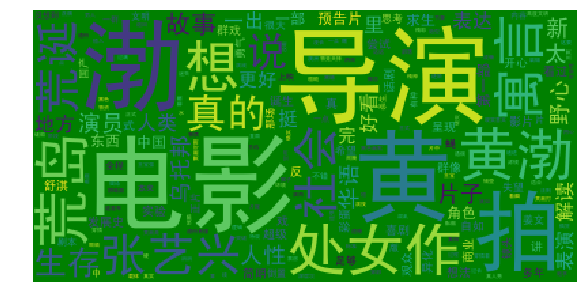

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包

wordcloud = WordCloud(font_path="simhei.ttf", background_color="green", max_font_size=80)


word_frequence = {x[0]: x[1] for x in words_stat.head(1000).values}

word_frequence_list1 = []
word_frequence_list2 = []
for key in word_frequence:
 # temp = (key,word_frequence[key])
 word_frequence_list1.append(key)
 word_frequence_list2.append(word_frequence[key])
    # word_dict
word_dict = zip(word_frequence_list1, word_frequence_list2)
word_dict = dict((name, value) for name, value in word_dict)
wordcloud = wordcloud.fit_words(word_dict)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()